# **INTRODUCTION**

Explores extensive movie data using data analysis techniques to understand patterns, characteristics, and relationships between important variables such as ratings, duration, revenue, and profit. This analysis considers four main factors: ratings, duration, revenue, and profit. By analyzing these factors, it provides an in-depth look at the characteristics and patterns in the movie industry. Whether you are interested in the highest rated movies, the relationship between duration and ratings, duration distribution, or the highest profits generated, this analysis presents customized insights to enhance your understanding of the global movie landscape.

# **DATA UNDERSTANDING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies_data = pd.read_csv("movies_metadata.csv")

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [ ]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# **DATA PREPARATION**

### Filter Data

In [ ]:
movies_data["release_date"] = pd.to_datetime(movies_data["release_date"])


In [ ]:
movies_data["release_date"].dtypes

dtype('<M8[ns]')

In [ ]:
movies_data["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [ ]:
movies_data["original_language"].nunique()

89

### Sorting

In [ ]:
english_release = movies_data[(movies_data["status"] == "Released") &\
                              (movies_data["original_language"] == "en")]

In [ ]:
english_release.sort_values(["budget","revenue"], ascending = [False, False]).head(20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
17124,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0
11827,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
26557,True,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0
11067,True,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0
44839,True,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,2017-06-21,6.049421e+08,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0
16130,True,"{'id': 463959, 'name': 'Tangled Collection', '...",260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757,tt0398286,en,Tangled,When the kingdom's most wanted-and most charmi...,...,2010-11-24,5.917949e+08,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,False,7.4,3419.0
18685,True,NaN,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",...,2012-03-07,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,False,6.1,2170.0
11780,True,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,2007-05-01,8.908716e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,5.9,3687.0
21174,True,NaN,255000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://disney.go.com/the-lone-ranger/,57201,tt1210819,en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,...,2013-07-03,8.928991e+07,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Never Take Off the Mask,The Lone Ranger,False,5.9,2361.0
43252,True,"{'id': 9485, 'name': 'The Fast and the Furious...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.fas

### Duplicate Data

In [ ]:
english_release[english_release.duplicated(subset= "original_title", keep = False)].sort_values("original_title")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15200,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,12219,tt0118528,en,12 Angry Men,During the trial of a man accused of his fathe...,...,1997-08-17,0.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,12 Angry Men,False,7.5,59.0
1161,True,NaN,350000,"[{'id': 18, 'name': 'Drama'}]",NaN,389,tt0050083,en,12 Angry Men,The defense and the prosecution have rested an...,...,1957-03-25,1000000.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life is in their hands. Death is on their minds.,12 Angry Men,False,8.2,2130.0
20847,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2966,tt0118248,en,"20,000 Leagues Under the Sea","The year is 1886, when New England's fishing h...",...,1997-05-11,0.0,158.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the last place on earth.,"20,000 Leagues Under the Sea",False,4.6,13.0
13003,True,NaN,200000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,30266,tt0006333,en,"20,000 Leagues Under the Sea",Captain Nemo has built a fantastic submarine f...,...,1916-12-24,8000000.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The First Submarine Photoplay Ever Filmed,"20,000 Leagues Under the Sea",False,6.0,7.0
24108,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,2965,tt0118247,en,"20,000 Leagues Under the Sea","In the 19th century, an expert marine biologis...",...,1997-03-23,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Darkness is to be feared... above and below.,"20,000 Leagues Under the Sea",False,6.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,True,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,1949,tt0443706,en,Zodiac,The true story of the investigation of 'The Zo...,...,2007-03-02,84785914.0,157.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's more than one way to lose your life to...,Zodiac,False,7.3,2080.0
37896,True,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,351065,tt3763866,en,Zoom,A multi-dimensional interface between a comic ...,...,2015-09-11,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Zoom,False,5.7,25.0
11171,True,NaN,35000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",NaN,14113,tt0383060,en,Zoom,Jack Shepard is an out-of-shape auto shop owne...,...,2006-08-11,12506188.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're going to save the world... as long as ...,Zoom,False,4.9,140.0
5761,True,"{'id': 374386, 'name': 'Anglo-Zulu War Collect...",3500000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,14433,tt0058777,en,Zulu,"In 1879, during the Zulu wars, man of the peop...",...,1964-01-22,8000000.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dwarfing the mightiest! Towering over the grea...,Zulu,False,7.4,137.0


In [ ]:
english_release.drop_duplicates(inplace = True)

<ipython-input-12-b9fffde2a416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.drop_duplicates(inplace = True)


### Missing Value

In [ ]:
english_release.isna().sum()

adult                        0
belongs_to_collection    28845
budget                       0
genres                       0
homepage                 25842
id                           0
imdb_id                     11
original_language            0
original_title               0
overview                    64
popularity                   0
poster_path                311
production_companies         0
production_countries         0
release_date                59
revenue                      0
runtime                      6
spoken_languages             0
status                       0
tagline                  14114
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [ ]:
english_release["belongs_to_collection"] = english_release["belongs_to_collection"].fillna("No Data")
english_release["homepage"] = english_release["homepage"].fillna("No Data")
english_release["poster_path"] = english_release["poster_path"].fillna("No Data")
english_release["tagline"] = english_release["tagline"].fillna("No tagline")

<ipython-input-14-2f7ddcfa90f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["belongs_to_collection"] = english_release["belongs_to_collection"].fillna("No Data")
<ipython-input-14-2f7ddcfa90f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["homepage"] = english_release["homepage"].fillna("No Data")
<ipython-input-14-2f7ddcfa90f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
english_release.dropna(inplace = True)

<ipython-input-15-69077d33911e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.dropna(inplace = True)


In [ ]:
english_release.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [ ]:
rating = pd.read_csv("ratings_small.csv")
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
print(rating.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


# **FEATURE ENGINEERING**

### Aggregate

In [ ]:
rating["timestamp"] = pd.to_datetime(rating["timestamp"], unit = "s")
rating.info

<bound method DataFrame.info of         userId  movieId  rating           timestamp
0            1       31     2.5 2009-12-14 02:52:24
1            1     1029     3.0 2009-12-14 02:52:59
2            1     1061     3.0 2009-12-14 02:53:02
3            1     1129     2.0 2009-12-14 02:53:05
4            1     1172     4.0 2009-12-14 02:53:25
...        ...      ...     ...                 ...
99999      671     6268     2.5 2003-10-08 02:16:10
100000     671     6269     4.0 2003-10-03 02:46:41
100001     671     6365     4.0 2003-12-09 03:26:03
100002     671     6385     2.5 2003-12-09 14:21:03
100003     671     6565     3.5 2004-01-22 15:18:44

[100004 rows x 4 columns]>

In [ ]:
rating.duplicated().sum()

0

In [ ]:
rating.groupby("movieId")["rating"].agg(["mean", "count", "median"])

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0
...,...,...,...
161944,5.000000,1,5.0
162376,4.500000,1,4.5
162542,5.000000,1,5.0


In [ ]:
movies_rating = rating.groupby("movieId")["rating"].agg(["mean", "median", "count"])
movies_rating

,mean,median,count
movieId,,,
1,3.872470,4.0,247
2,3.401869,3.0,107
3,3.161017,3.0,59
4,2.384615,3.0,13
5,3.267857,3.0,56
...,...,...,...
161944,5.000000,5.0,1
162376,4.500000,4.5,1
162542,5.000000,5.0,1


### Join

In [ ]:
english_release_rating = english_release.merge(movies_rating,
                      left_on = "id",
                      right_on = "movieId",
                      how = "inner")
english_release_rating

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,mean,median,count
0,True,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,3.75,16
1,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,1.50,2
2,True,No Data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,4.00,43
3,True,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,3.50,36
4,True,No Data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,True,No Data,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No Data,2286,tt0381111,en,Kruistocht in Spijkerbroek,Dolf a 15 year old boy is sent back in time by...,...,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,No tagline,Crusade in Jeans,False,6.0,15.0,1.666667,1.00,3
2047,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sex and Drugs before Rock and Roll,Beat,False,4.9,9.0,3.636364,4.00,22
2048,True,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No Data,2331,tt0199232,en,Jesus,The film is notable for presenting a more huma...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No tagline,Jesus,False,5.4,8.0,3.777778,4.00,9
2049,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,80831,tt1576459,en,Sang Pemimpi,This movie is an adaptation from a popular nov...,...,"[{'iso_639_1': 'id', 'name': 'Bahasa indonesia'}]",Released,No tagline,Sang Pemimpi,False,6.5,2.0,3.250000,3.25,4


# **EXPLARATORY DATA ANALYSIS**

### 1. Bagaimana distribusi dari film-film yang memiliki rating >3?

In [ ]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()
rating_movies

,movieId,rating
0,1,4.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0


<Axes: xlabel='rating', ylabel='Count'>

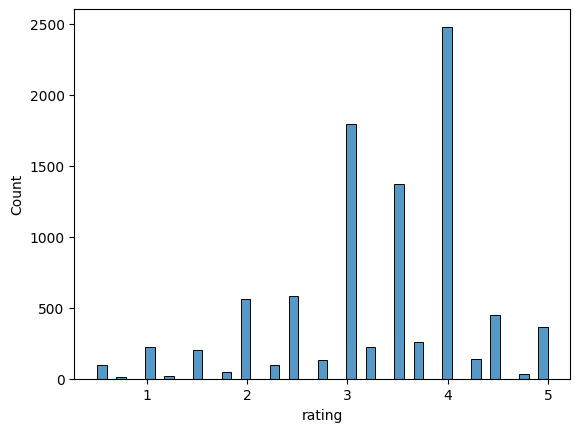

In [ ]:
sns.histplot(data = rating_movies,
             x = "rating")

In [ ]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

<Axes: ylabel='count'>

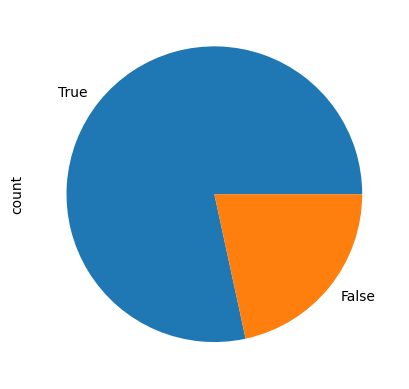

In [ ]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

In [ ]:
# film-film dengan rating >= 3 lebih banyak daripada film-film dengan rating dibawahnya

## 2. Bagaimana distribusi dari durasi film yang ada?

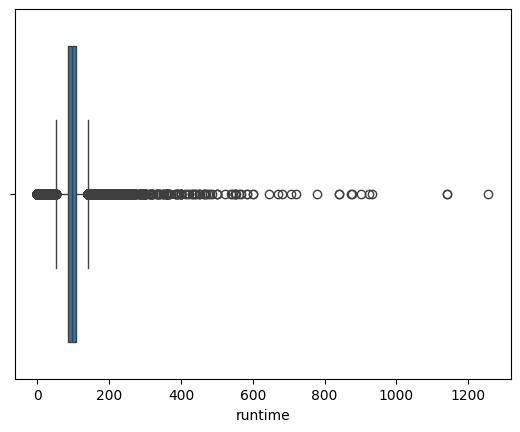

In [ ]:
sns.boxplot(data = movies_data, x = "runtime" )
plt.show()

In [ ]:
# Banyak film yang memiliki durasi dalam rentang  >= 200 dan <= 600

## 3. Apakah ada hubungan antara durasi film dengan rating yang didapatkan?

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  bool          
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  int64         
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  int64         
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

In [ ]:
rating_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9066 entries, 0 to 9065
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      9066 non-null   int64  
 1   rating       9066 non-null   float64
 2   good_movies  9066 non-null   bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 150.6 KB


In [ ]:
duration_rating = movies_data.merge(rating_movies,
                                    left_on = "id",
                                    right_on = "movieId",
                                    how = "outer")

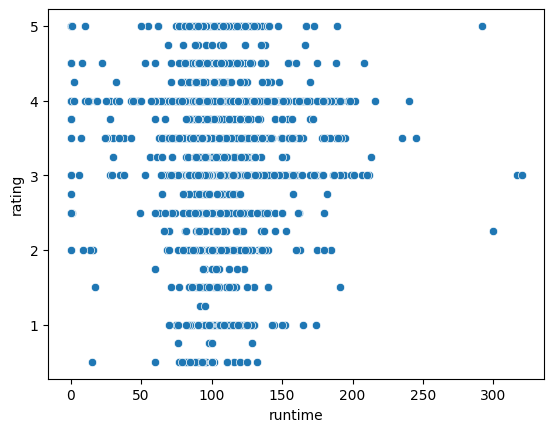

In [ ]:
sns.scatterplot(data = duration_rating,
                x = "runtime",
                y = "rating")
plt.show()

In [ ]:
# Secara garis besar tidak ada hubungannya

## 4. Bagaimana distribusi dari keuntungan (profit) yang dihasilkan oleh suatu film?

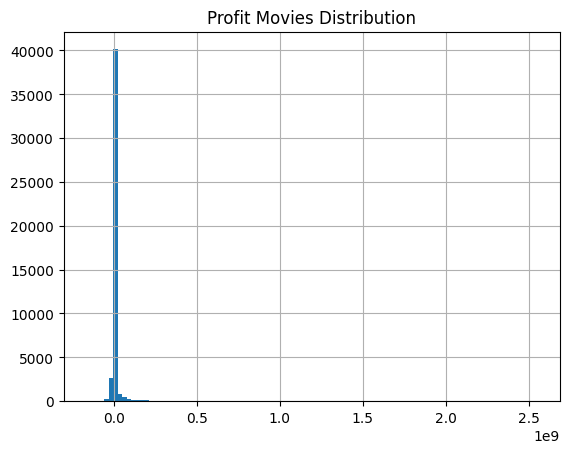

In [ ]:
movies_data["profit"] = movies_data["revenue"] - movies_data["budget"]
movies_data["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [ ]:
movies_data["profit"].describe()

count    4.546000e+04
mean     6.984491e+06
std      5.214125e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

<Axes: >

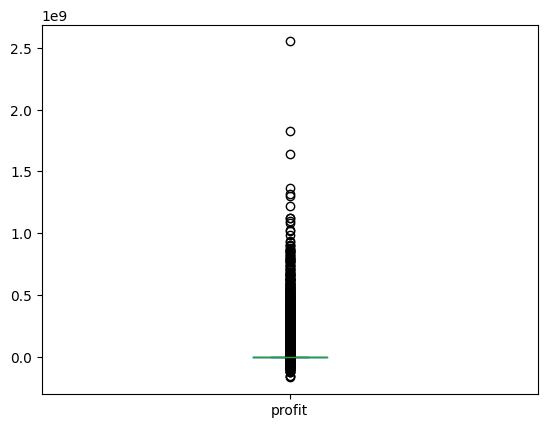

In [ ]:
movies_data["profit"].plot(kind = "box")

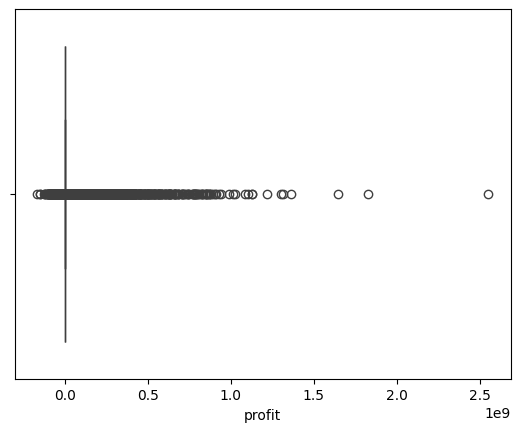

In [ ]:
sns.boxplot(data = movies_data, x = "profit" )
plt.show()

In [ ]:
movies_data["profit"].quantile(0.88)

43391.87999999827

In [ ]:
# Hanya ada 12% film yang mampu memberikan profit. Sementara sisanya hanya balik modal

## 5. Apakah ada korelasi antara popularitas dan rating?

In [ ]:
correlation = movies_data['popularity'].corr(movies_data['vote_average'])

print("Korelasi antara popularitas dan rating:", correlation)

Korelasi antara popularitas dan rating: 0.15439944286409166


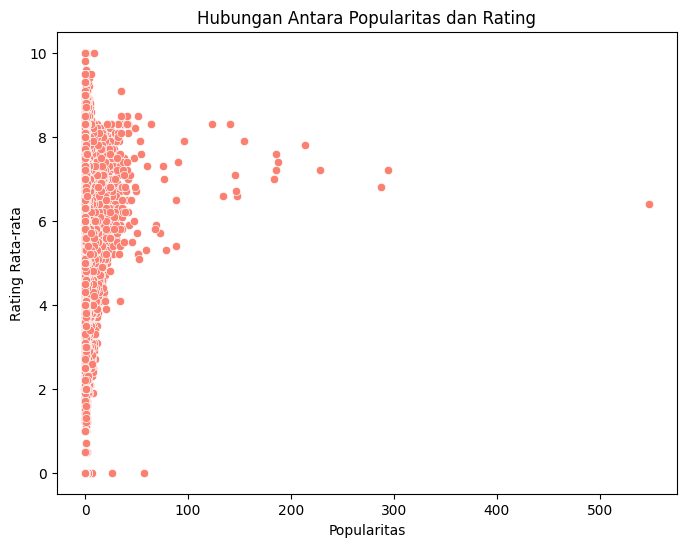

In [ ]:
# Visualisasi hubungan antara popularitas dan rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='popularity', y='vote_average', data=movies_data, color='salmon')
plt.title('Hubungan Antara Popularitas dan Rating')
plt.xlabel('Popularitas')
plt.ylabel('Rating Rata-rata')
plt.show()

Secara garis besar tidak ada hubungannya, popularitas tidak selalu menjamin rating yang tinggi dan juga sebaliknya

## 6. Film apa saja yang masuk 10 besar dalam hal popularitas tertinggi?



In [ ]:
top_10 = movies_data.nlargest(10, 'popularity')

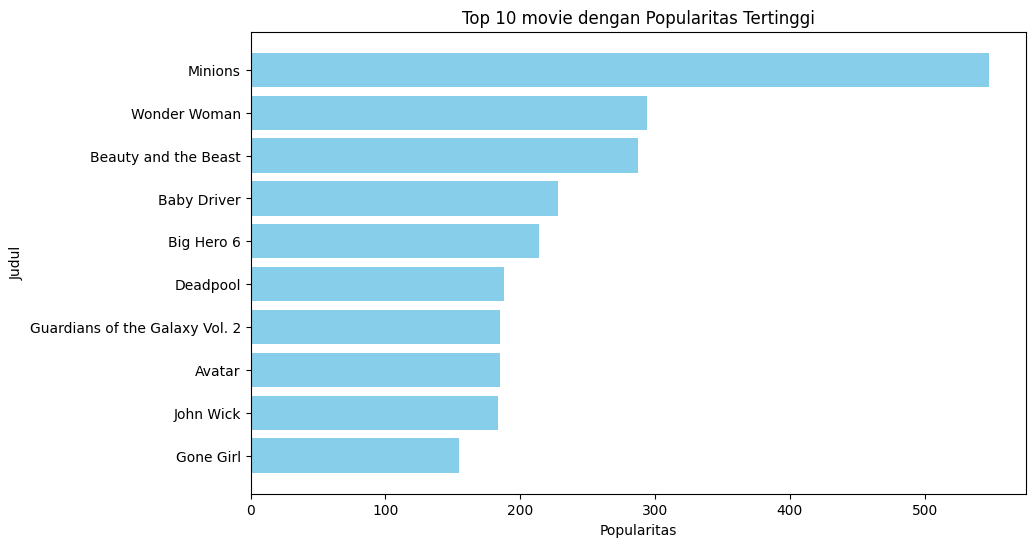

In [ ]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.barh(top_10['original_title'], top_10['popularity'], color='skyblue')
plt.xlabel('Popularitas')
plt.ylabel('Judul')
plt.title('Top 10 movie dengan Popularitas Tertinggi')
plt.gca().invert_yaxis()
plt.show()

# CONCLUSION

Through the analysis that has been conducted, it is found that many movies have a rating above 3, with varying durations mainly ranging from 200-600 minutes. However, no significant correlation was found between the duration of the movie and the rating obtained. Only about 12% of movies are able to generate profits, while the rest only return the investment capital. However, the popularity of a movie also does not always correlate with the rating obtained, where a popular movie does not guarantee a high rating and vice versa. Movies with the highest popularity include Minions, Wonder Woman, Beauty and the Beast, Baby Driver, and several other titles.